In [121]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [122]:
data = pd.read_csv("responses.csv")
data.drop("Is there anything else you would like to tell us about?",inplace=True,axis=1)
data.drop("Timestamp",inplace=True,axis=1)
data["I graduated MSSM X decades ago"] = (2016 - data["I graduated MSSM in..."]) / 10.
data.drop("I graduated MSSM in...",inplace=True,axis=1)
data

,I want to keep the school up to date about my contact info,I want to keep the school up to date about my résumé,I want to easily find classmates via Facebook,I want to easily find classmates via LinkedIn,I want to be prompted to reminisce on Facebook (an annual Throwback Thursday ala Seth’s post last year),I want to continue or start attending the “End of the World” alumni event,I want to understand what other alumni did during their time at the school,I want to understand how the school is using donations,I want to understand how the school is using donations I have given (or will give),I want to understand how I could contribute to the school in non-monetary ways,I want to reach out to alumni about temporary or permanent positions in my company,I want to reach out to alumni or students about internships or junior positions,I want to reach out to alumni to find people who have specific skills or expertise for consultation or advice,I want to reach out to alumni to find people who can make introductions to others for networking purposes,I prefer to communicate via Facebook,I prefer to communicate via LinkedIn,I prefer to communicate via email,I prefer to communicate via snail mail,I graduated MSSM X decades ago
0,5,4,5,5,5,5,5,4,5.0,3,3,5,4,4.0,4.0,1.0,1.0,1.0,0.2
1,5,4,4,2,4,4,3,4,4.0,5,3,4,4,3.0,5.0,2.0,5.0,2.0,0.1
2,3,1,5,1,5,5,3,5,5.0,3,1,1,1,1.0,5.0,1.0,1.0,1.0,1.8
3,1,2,3,3,4,4,1,4,4.0,4,4,4,4,4.0,3.0,3.0,3.0,2.0,1.9
4,3,3,3,4,4,3,3,3,3.0,3,4,3,3,4.0,4.0,2.0,4.0,1.0,1.1
5,4,4,3,3,3,4,3,5,5.0,5,5,5,5,5.0,2.0,4.0,4.0,2.0,0.7
6,5,3,3,1,3,4,2,4,4.0,5,3,1,1,3.0,5.0,1.0,5.0,1.0,1.6
7,4,4,4,2,5,5,5,5,5.0,4,3,3,3,4.0,4.0,1.0,5.0,1.0,0.1
8,5,4,5,5,5,5,3,1,1.0,4,2,3,3,4.0,5.0,2.0,2.0,2.0,0.5
9,5,5,5,5,5,3,5,5,5.0,5,1,1,5,5.0,5.0,1.0,5.0,1.0,1.8


In [123]:
corr = data.corr()
corr

,I want to keep the school up to date about my contact info,I want to keep the school up to date about my résumé,I want to easily find classmates via Facebook,I want to easily find classmates via LinkedIn,I want to be prompted to reminisce on Facebook (an annual Throwback Thursday ala Seth’s post last year),I want to continue or start attending the “End of the World” alumni event,I want to understand what other alumni did during their time at the school,I want to understand how the school is using donations,I want to understand how the school is using donations I have given (or will give),I want to understand how I could contribute to the school in non-monetary ways,I want to reach out to alumni about temporary or permanent positions in my company,I want to reach out to alumni or students about internships or junior positions,I want to reach out to alumni to find people who have specific skills or expertise for consultation or advice,I want to reach out to alumni to find people who can make introductions to others for networking purposes,I prefer to communicate via Facebook,I prefer to communicate via LinkedIn,I prefer to communicate via email,I prefer to communicate via snail mail,I graduated MSSM X decades ago
I want to keep the school up to date about my contact info,1.000000,0.500741,0.360754,0.167129,0.183811,0.048288,0.114488,0.192338,0.137803,0.359411,0.150084,0.181543,0.285790,0.279367,0.247181,-0.032838,0.357313,0.115244,-0.040851
I want to keep the school up to date about my résumé,0.500741,1.000000,0.274386,0.522031,0.305930,0.220492,0.264286,0.035940,0.202090,0.200305,0.266807,0.291266,0.411981,0.337970,-0.064818,0.323647,0.193200,-0.118592,-0.174794
I want to easily find classmates via Facebook,0.360754,0.274386,1.000000,0.329935,0.570546,0.310619,0.371791,0.308261,0.170453,0.323106,0.185189,0.253898,0.232740,0.284990,0.439719,-0.073430,0.075801,0.100486,-0.086832
I want to easily find classmates via LinkedIn,0.167129,0.522031,0.329935,1.000000,0.293482,0.217350,0.334043,-0.079302,0.109698,0.016270,0.243947,0.305745,0.303752,0.533587,-0.065883,0.481538,-0.043486,-0.110451,-0.226855
I want to be prompted to reminisce on Facebook (an annual Throwback Thursday ala Seth’s post last year),0.183811,0.305930,0.570546,0.293482,1.000000,0.313367,0.458042,0.216006,0.188554,0.214474,0.067361,0.158340,0.118086,0.068397,0.360786,-0.105233,-0.069010,0.015457,-0.164378
I want to continue or start attending the “End of the World” alumni event,0.048288,0.220492,0.310619,0.217350,0.313367,1.000000,0.306593,0.146265,0.225901,0.144419,-0.014643,0.054259,-0.120515,-0.127252,0.042749,0.079291,-0.049003,-0.015805,-0.261897
I want to understand what other alumni did during their time at the school,0.114488,0.264286,0.371791,0.334043,0.458042,0.306593,1.000000,0.267858,0.354924,0.191887,0.177869,0.357102,0.261041,0.260900,0.189960,-0.061319,0.107916,-0.079320,-0.333637
I want to understand how the school is using donations,0.192338,0.035940,0.308261,-0.079302,0.216006,0.146265,0.267858,1.000000,0.683377,0.554530,0.259338,0.185678,0.271338,0.207088,0.218540,-0.085033,0.256122,0.078128,0.116513
I want to understand how the school is using donations I have given (or will give),0.137803,0.202090,0.170453,0.109698,0.188554,0.225901,0.354924,0.683377,1.000000,0.486483,0.272956,0.196886,0.222540,0.219761,0.181182,0.086043,0.054768,0.017630,0.052610
I want to understand how I could contribute to the school in non-monetary ways,0.359411,0.200305,0.323106,0.016270,0.214474,0.144419,0.191887,0.554530,0.486483,1.000000,0.469821,0.343158,0.453832,0.347352,0.181301,0.062538,0.204884,0.256598,0.059464


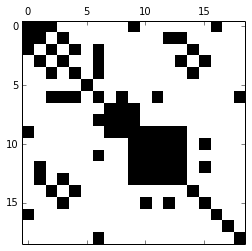

In [124]:
significant = 0.33
plt.spy(corr.abs() > significant)
plt.show()

In [125]:
factors = data.mean().sort_values(ascending=False)
factors

I want to understand how I could contribute to the school in non-monetary ways                                   4.258065
I want to continue or start attending the “End of the World” alumni event                                        4.096774
I want to understand how the school is using donations                                                           4.080645
I want to be prompted to reminisce on Facebook (an annual Throwback Thursday ala Seth’s post last year)          4.048387
I want to understand how the school is using donations I have given (or will give)                               3.901639
I want to keep the school up to date about my contact info                                                       3.887097
I want to easily find classmates via Facebook                                                                    3.854839
I prefer to communicate via Facebook                                                                             3.836066
I want to reach out to a

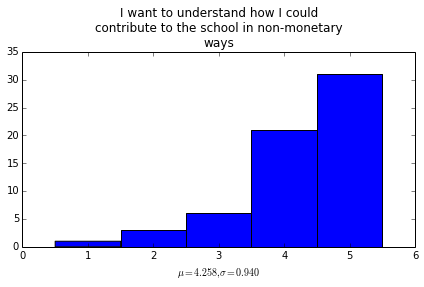

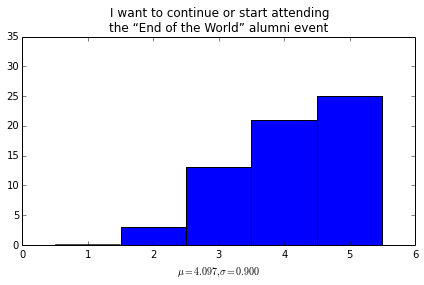

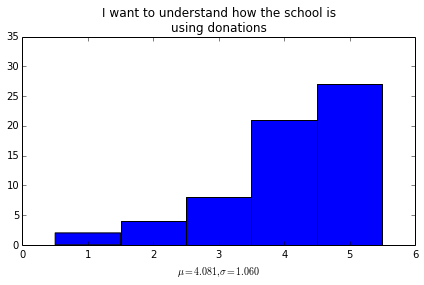

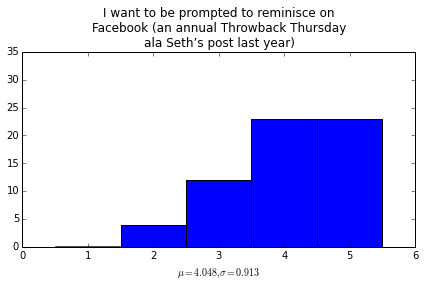

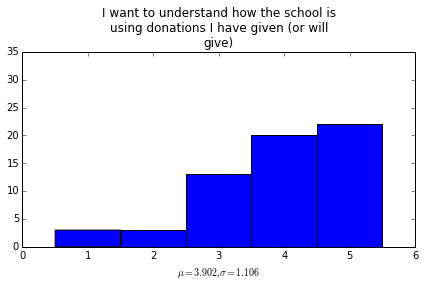

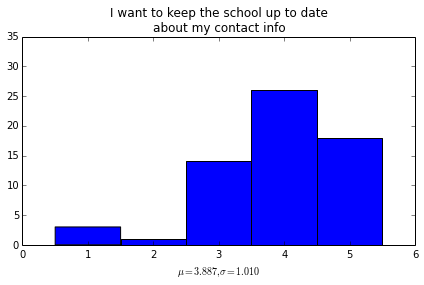

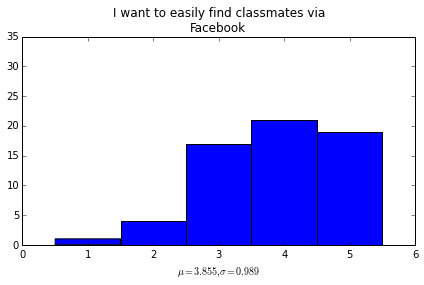

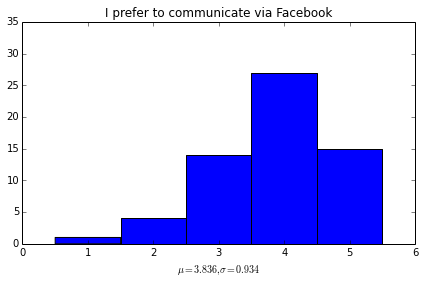

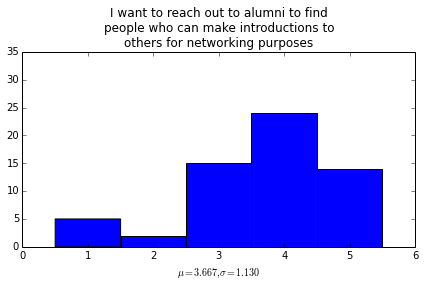

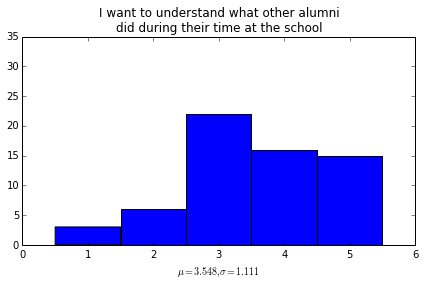

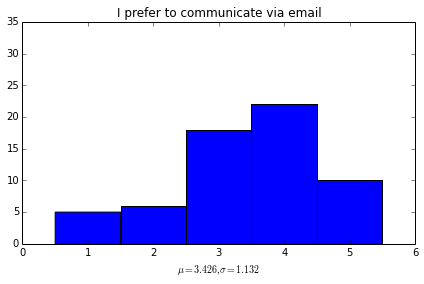

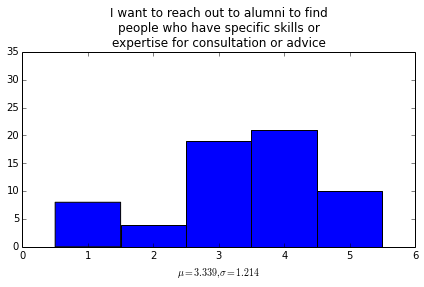

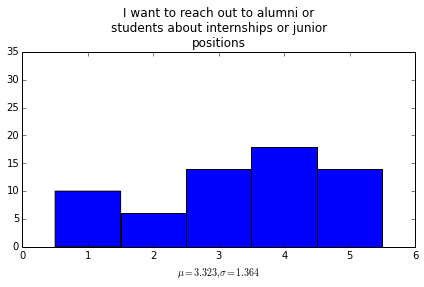

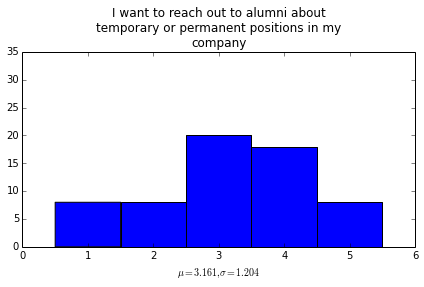

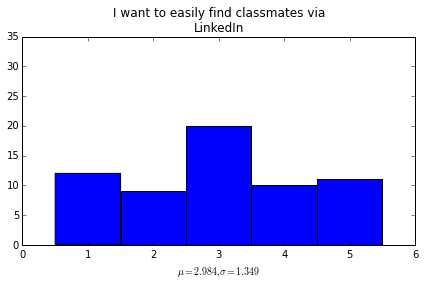

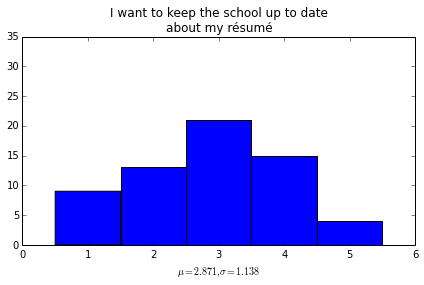

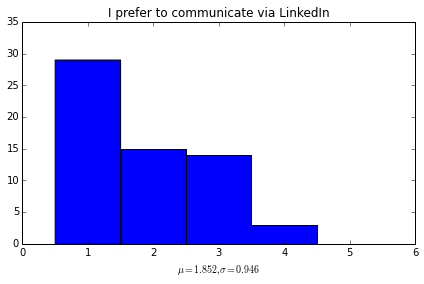

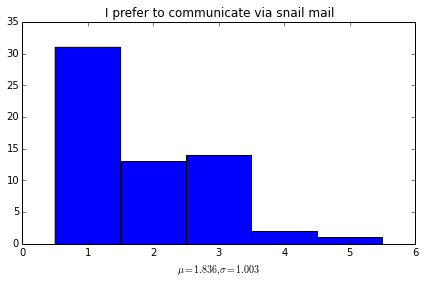

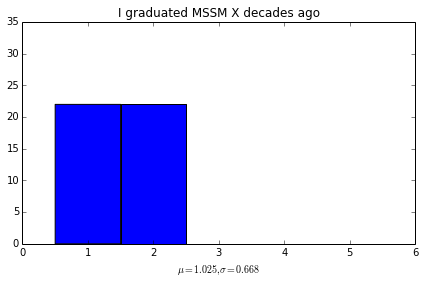

In [126]:
import textwrap
for k, f in enumerate(list(factors.index)):
    x = data[f]
    plt.figure(k)
    plt.hist(x[np.isfinite(x)], 5, range=[0.5, 5.5])
    plt.xlim([0, 6])
    plt.ylim([0, 35])
    mu = x.mean()
    sigma = x.std()
    title = textwrap.fill(unicode(f, "utf-8"), 40)
    plt.title(title, multialignment="center")
    plt.xlabel(u"$\mu=%0.3f, \sigma=%0.3f$" % (mu, sigma))
    plt.tight_layout()
    plt.savefig("mean_%04d_fig_%02d.svg" % (int(abs(mu * 1000)), k))

In [127]:
corr_d = {}
for i, n in enumerate(list(factors.index)):
    for j, m in enumerate(list(factors.index)):
        if i <= j:
            continue
        v = corr[n][m]
        if abs(v) <= significant:
            continue
        corr_d["%s : %s" % (n, m)] = [v] # avoids having to create an index
corr_df = pd.DataFrame(data=corr_d).mean() # back to a format sort_values understands
corr_df.sort_values(ascending=False)

I want to reach out to alumni about temporary or permanent positions in my company : I want to reach out to alumni or students about internships or junior positions                                                         0.826247
I want to understand how the school is using donations I have given (or will give) : I want to understand how the school is using donations                                                                                  0.683377
I want to reach out to alumni or students about internships or junior positions : I want to reach out to alumni to find people who have specific skills or expertise for consultation or advice                              0.655523
I want to reach out to alumni to find people who have specific skills or expertise for consultation or advice : I want to reach out to alumni to find people who can make introductions to others for networking purposes    0.608417
I want to easily find classmates via Facebook : I want to be prompted to reminis

In [128]:
contentious = data.std().sort_values(ascending=False)
contentious


I want to reach out to alumni or students about internships or junior positions                                  1.364349
I want to easily find classmates via LinkedIn                                                                    1.348854
I want to reach out to alumni to find people who have specific skills or expertise for consultation or advice    1.213902
I want to reach out to alumni about temporary or permanent positions in my company                               1.203731
I want to keep the school up to date about my résumé                                                             1.137784
I prefer to communicate via email                                                                                1.132240
I want to reach out to alumni to find people who can make introductions to others for networking purposes        1.129972
I want to understand what other alumni did during their time at the school                                       1.111452
I want to understand how

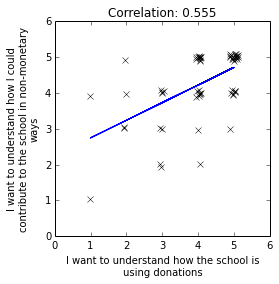

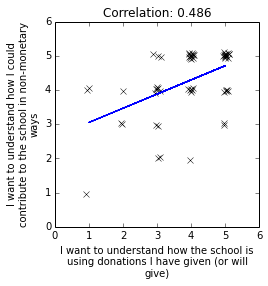

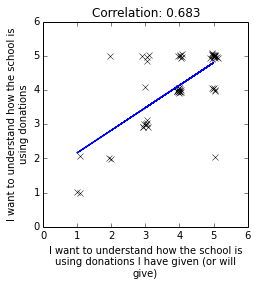

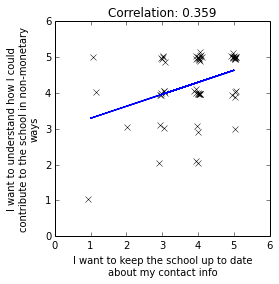

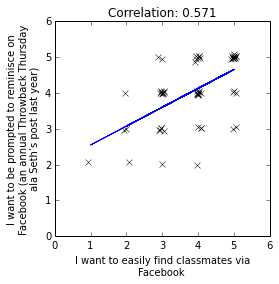

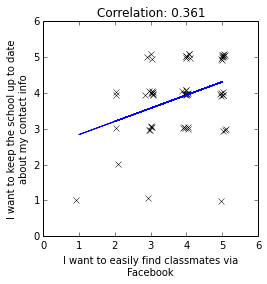

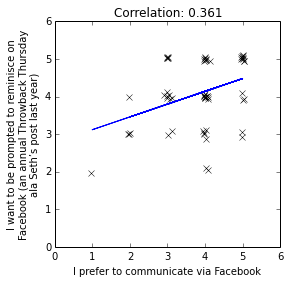

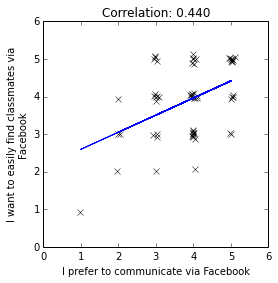

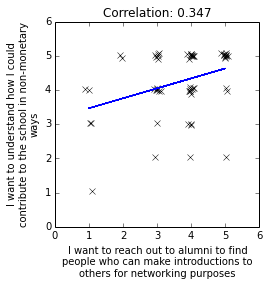

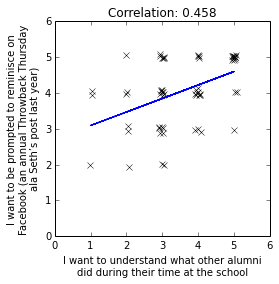

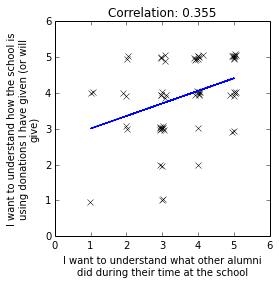

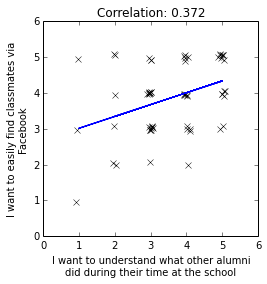

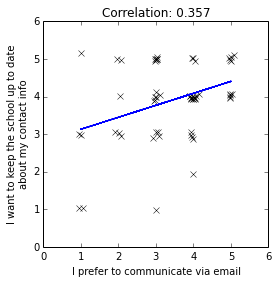

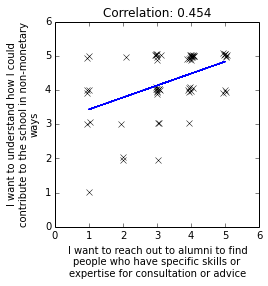

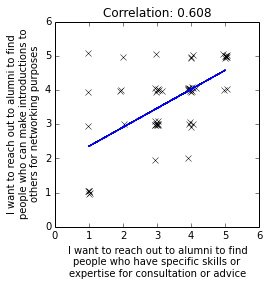

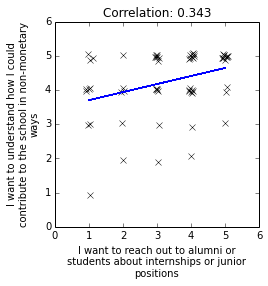

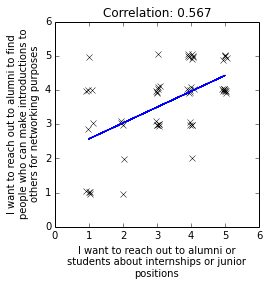

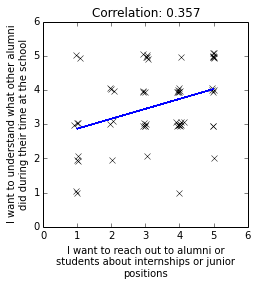

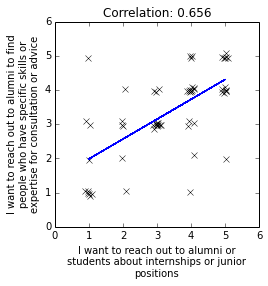

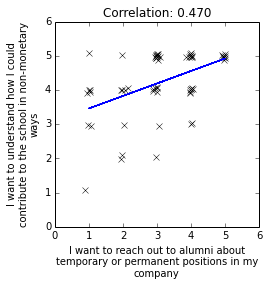

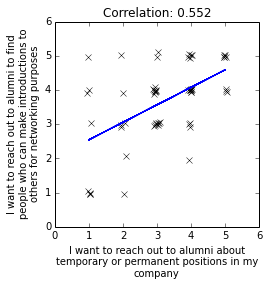

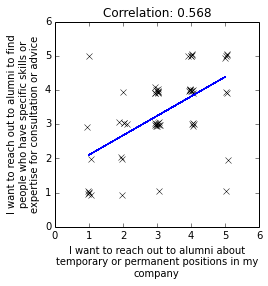

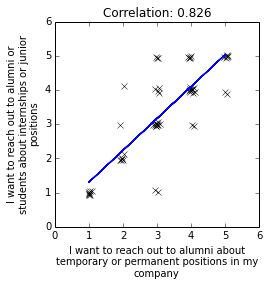

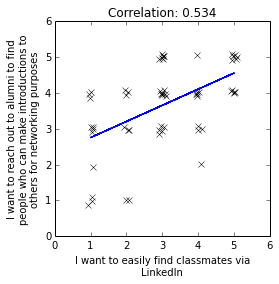

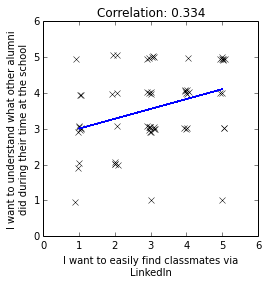

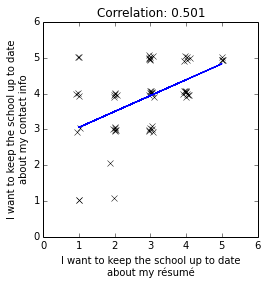

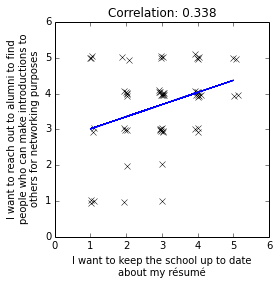

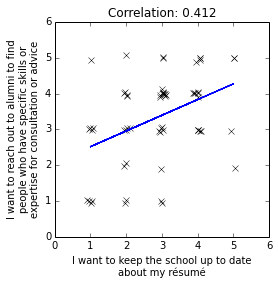

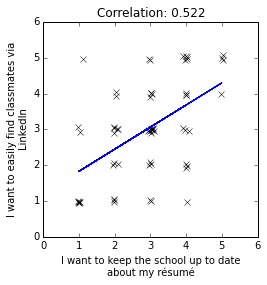

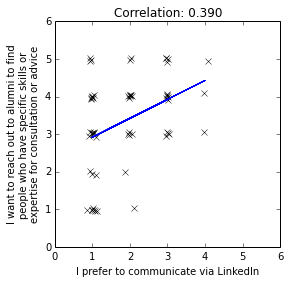

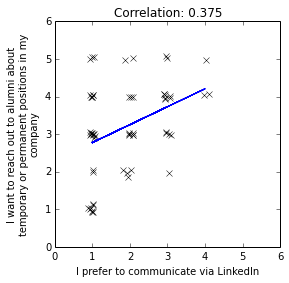

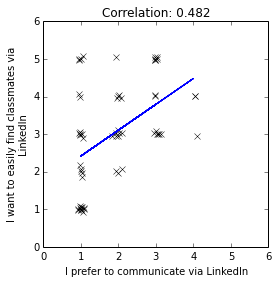

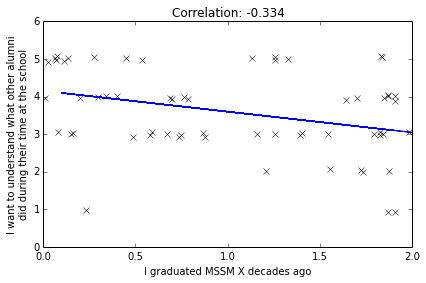

In [132]:
import textwrap

def vs_plot(xlabel, ylabel):
    jitter = 0.05
    x = data[xlabel]
    xj = x + np.random.normal(0, jitter, data.shape[0])
    y = data[ylabel]
    yj = y + np.random.normal(0, jitter, data.shape[0])
    finite = np.isfinite(x) &  np.isfinite(y)
    m, b = np.polyfit(x[finite], y[finite], 1)
    plt.plot(xj, yj, "kx")
    plt.plot(x, m*x + b, 'b-')
    n = 40
    plt.ylim([0, 6])
    if "decades" not in xlabel:
        plt.xlim([0, 6])
        plt.axes().set_aspect("equal")
    plt.xlabel(textwrap.fill(unicode(xlabel, "utf-8"), n), multialignment="center")
    plt.ylabel(textwrap.fill(unicode(ylabel, "utf-8"), n), multialignment="center")
    plt.title("Correlation: %0.3f" % corr[xlabel][ylabel])

    
k = 0
for i, n in enumerate(list(factors.index)):
    for j, m in enumerate(list(factors.index)):
        if i <= j:
            continue
        v = corr[n][m]
        if abs(v) <= significant:
            continue
        k += 1
        plt.figure(k)
        vs_plot(n, m)
        plt.tight_layout()
        plt.savefig("corr_%04d_fig_%02d.svg" % (int(abs(v * 1000)), k))

In [130]:
data.shape

(62, 19)